# Импорты


In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, power_transform
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
import pickle

%matplotlib inline

# Загрузка данных



In [4]:
df = pd.read_csv('/content/ebw_data.csv')

# Изучение датасета

In [5]:
# вывод первых 5 строк
df.head()

,IW,IF,VW,FP,Depth,Width
0,47,139,4.5,80,1.60,2.54
1,47,139,4.5,80,1.62,2.50
2,47,139,4.5,80,1.68,2.60
3,47,139,4.5,80,1.58,2.52
4,45,140,4.5,80,1.76,2.48


In [6]:
# всего 72 строки, 6 колонок, тип данных - целые числа и числа с плавающей запятой, преобразование данных не требуется
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IW      72 non-null     int64  
 1   IF      72 non-null     int64  
 2   VW      72 non-null     float64
 3   FP      72 non-null     int64  
 4   Depth   72 non-null     float64
 5   Width   72 non-null     float64
dtypes: float64(3), int64(3)
memory usage: 3.5 KB


In [7]:
# разброс данных не большой
df.describe()

,IW,IF,VW,FP,Depth,Width
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,45.666667,141.333333,8.638889,78.333333,1.195556,1.970417
std,1.678363,5.145763,2.061078,21.493530,0.225081,0.279040
min,43.000000,131.000000,4.500000,50.000000,0.800000,1.680000
25%,44.000000,139.000000,8.000000,60.000000,1.080000,1.760000
50%,45.500000,141.000000,9.000000,80.000000,1.200000,1.840000
75%,47.000000,146.000000,10.000000,80.000000,1.290000,2.050000
max,49.000000,150.000000,12.000000,125.000000,1.760000,2.600000


In [8]:
# Проверка, есть ли отсутствующие значения, таких нет
df.isnull().sum()

IW       0
IF       0
VW       0
FP       0
Depth    0
Width    0
dtype: int64

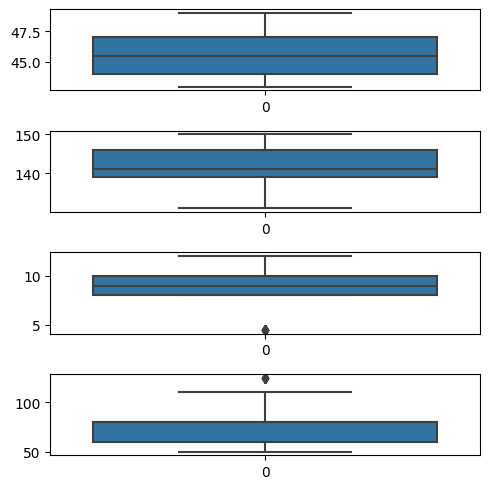

In [9]:
# Проверка, есть ли выбросы. Выбросы есть в колонках VW и FP, но данных не много, поэтому выбросы оставляю.
fig, axs = plt.subplots(4, figsize = (5,5))
plt1 = sns.boxplot(df['IW'], ax = axs[0])
plt2 = sns.boxplot(df['IF'], ax = axs[1])
plt3 = sns.boxplot(df['VW'], ax = axs[2])
plt4 = sns.boxplot(df['FP'], ax = axs[3])
plt.tight_layout()

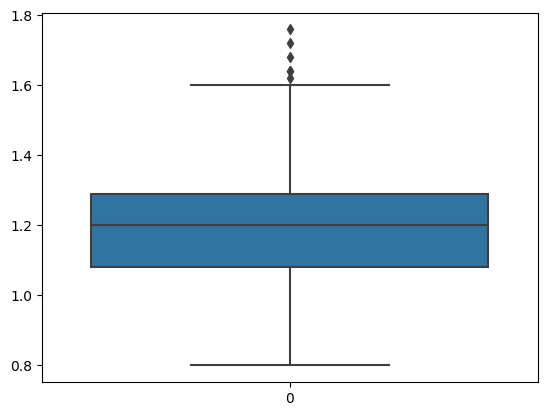

In [10]:
# Целевые переменные
sns.boxplot(df['Depth'])

plt.show()

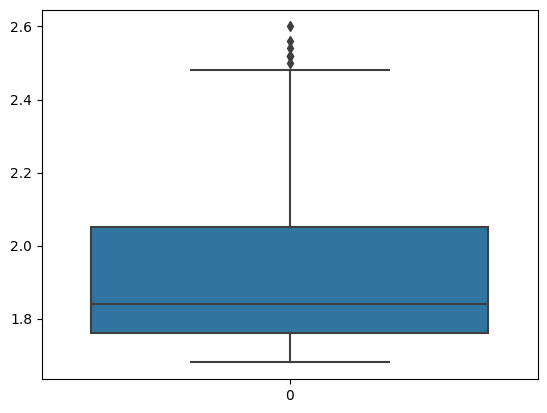

In [11]:
sns.boxplot(df['Width'])
plt.show()

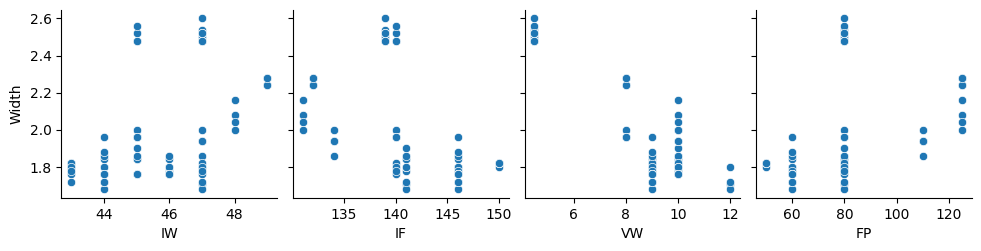

In [12]:
sns.pairplot(df, x_vars=['IW', 'IF', 'VW', 'FP'], y_vars='Width')
plt.show()

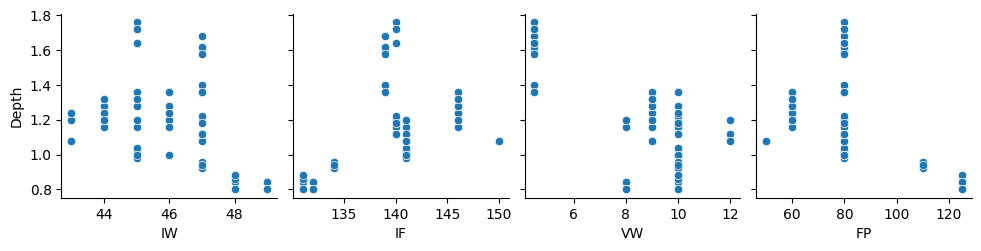

In [13]:
sns.pairplot(df, x_vars=['IW', 'IF', 'VW', 'FP'], y_vars='Depth')
plt.show()

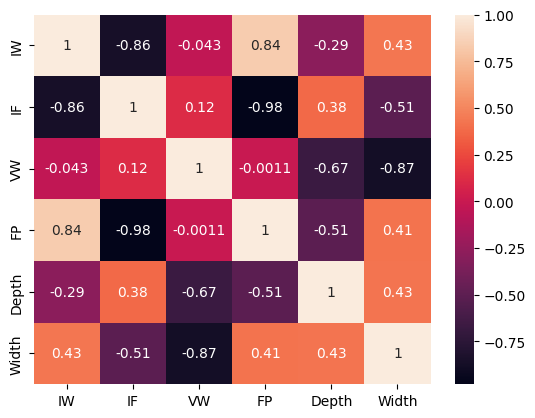

In [14]:
# Наблюдается достаточно высокая отрицательня корелляция глубины, ширины и VW,IF,а также положит. корелляция ширины и IW FP.
# Интересно: выявлена высокая взаимосвязь признаков FP, IW, IF. В связи с тем, что датасет небольшой, оставила в первоначальном виде.
# Целевые переменные также взаимозависимы.
sns.heatmap(df.corr(), annot=True)
plt.show()

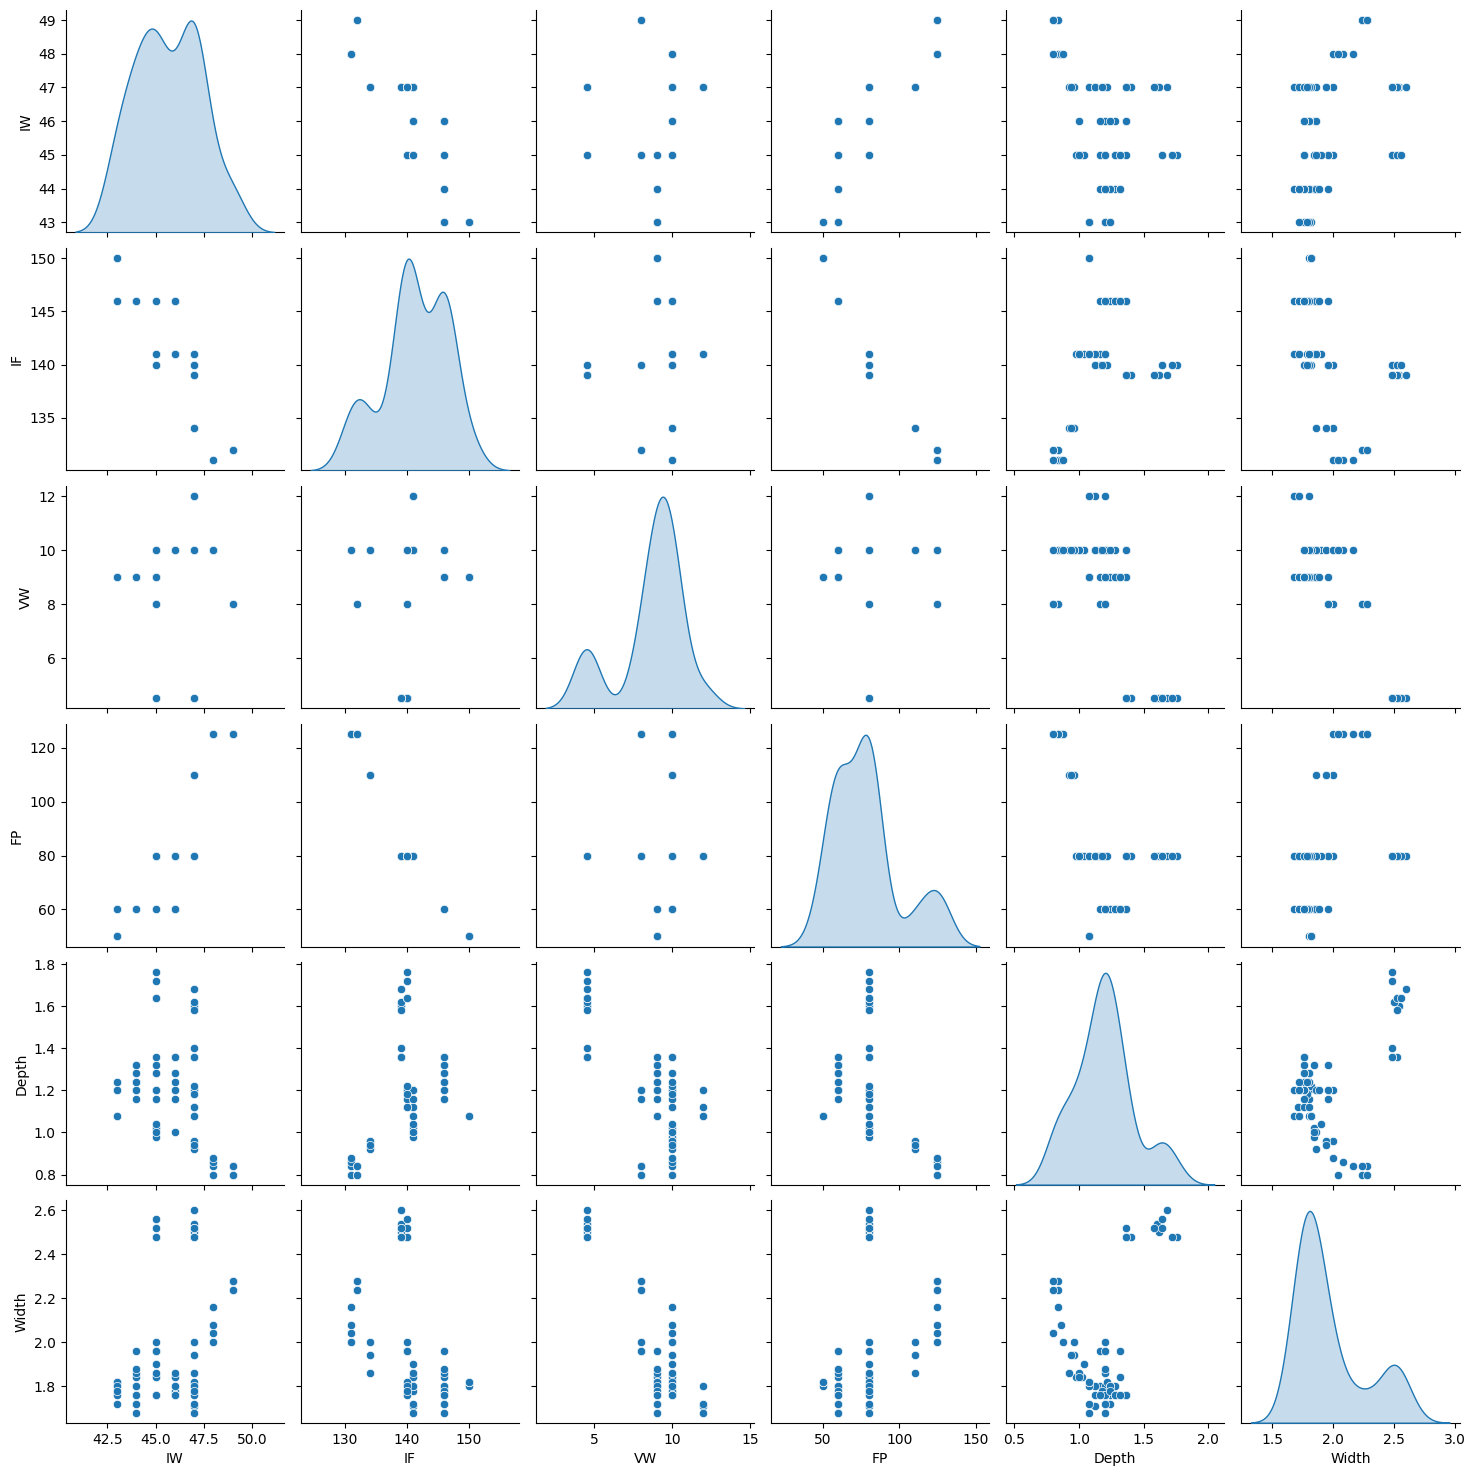

In [15]:
sns.pairplot(df.head(72), diag_kind='kde')

# Сборка датасета

In [16]:
# Выделение целевых переменных
X = df.drop(["Width", "Depth"], axis=1)
Y = df[["Width", "Depth"]].copy()

In [17]:
# Проверка размерности
X.shape, Y.shape

((72, 4), (72, 2))

In [18]:
# описание датасета без целевых переменных
X.describe()

,IW,IF,VW,FP
count,72.000000,72.000000,72.000000,72.000000
mean,45.666667,141.333333,8.638889,78.333333
std,1.678363,5.145763,2.061078,21.493530
min,43.000000,131.000000,4.500000,50.000000
25%,44.000000,139.000000,8.000000,60.000000
50%,45.500000,141.000000,9.000000,80.000000
75%,47.000000,146.000000,10.000000,80.000000
max,49.000000,150.000000,12.000000,125.000000


In [19]:
# описание датасета с целевыми переменными
Y.describe()

,Width,Depth
count,72.000000,72.000000
mean,1.970417,1.195556
std,0.279040,0.225081
min,1.680000,0.800000
25%,1.760000,1.080000
50%,1.840000,1.200000
75%,2.050000,1.290000
max,2.600000,1.760000


In [20]:
# Нормализация данных
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
Y_scaled = scaler.fit_transform(Y)

In [21]:
# Проверка нормализации
X_scaled[:5]

array([[0.66666667, 0.42105263, 0.        , 0.4       ],
       [0.66666667, 0.42105263, 0.        , 0.4       ],
       [0.66666667, 0.42105263, 0.        , 0.4       ],
       [0.66666667, 0.42105263, 0.        , 0.4       ],
       [0.33333333, 0.47368421, 0.        , 0.4       ]])

In [22]:
Y_scaled[:5]

array([[0.93478261, 0.83333333],
       [0.89130435, 0.85416667],
       [1.        , 0.91666667],
       [0.91304348, 0.8125    ],
       [0.86956522, 1.        ]])

In [23]:
# Разделение выборки на тренировочную и тестовую
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, train_size=0.7, test_size=0.3, random_state=0)

In [24]:
# Проверка размерности
X_train.shape, Y_train.shape, Y_test.shape, X_test.shape

((50, 4), (50, 2), (22, 2), (22, 4))

In [25]:
# функция обучения модели
def get_fit (X, Y, model):
    model.fit(X,Y)
    Y_pred = model.predict(X_test)
    return Y_pred

In [26]:
# функция отрисовки графика отклонений предсказанных данных от тестовых
def get_plt (test, pred):
    plt.scatter(test, pred)
    plt.xlabel('test')
    plt.ylabel('pred')
    plt.show()

In [27]:
# оценка модели
model_e = dict()
def get_e (Y_test, Y_pred):
    MAE = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')
    MSE = mean_squared_error(Y_test, Y_pred, multioutput='raw_values')
    RMSE = np.sqrt(MSE)
    r2 = r2_score(Y_test, Y_pred, multioutput='raw_values')
    print ("MAE:", MAE, "MSE:", MSE, "RMSE:", RMSE, "R2:", r2)
    return MAE, MSE, RMSE, r2

In [28]:
# функция сравнения результатов
dataframes = []
def get_best_model():
    for model,e in model_e.items():
        dataframes.append(pd.DataFrame({
                                       'Model': model,
                                       'MAE': e[0],
                                       'MSE': e[1],
                                       'RMSE': e[2],
                                       'R2': e[3],
        }, index=["width", "depth"]))
    results = pd.DataFrame()
    for dataframe in dataframes:
        results = pd.concat([results, dataframe])
    results = results [['Model', 'MAE', 'MSE', 'RMSE', 'R2']]
    results_sorted = results.sort_values (by = ['R2', 'MAE'], ascending = [ False , True ])
    width_best = results_sorted.loc['width']
    depth_best = results_sorted.loc['depth']
    print("width_best:", width_best.iloc[0])
    print("depth_best:", depth_best.iloc[0])
    return results_sorted

# Создание и обучение моделей

### Линейна регрессия

In [29]:
LinR = LinearRegression()

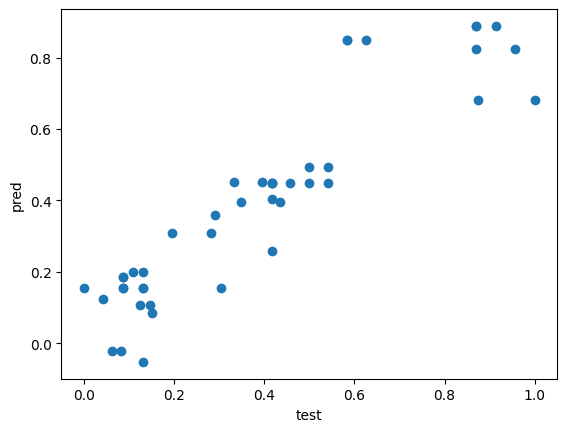

In [30]:
get_plt(Y_test, get_fit(X_train, Y_train, LinR))

In [31]:
e1 = get_e(Y_test, get_fit(X_train, Y_train, LinR))

MAE: [0.07476751 0.10185822] MSE: [0.00781705 0.01892668] RMSE: [0.08841406 0.13757428] R2: [0.92539716 0.62138624]


In [32]:
model_e['LinR'] = e1

### Метод к ближайших соседей

In [33]:
knn = KNeighborsRegressor()

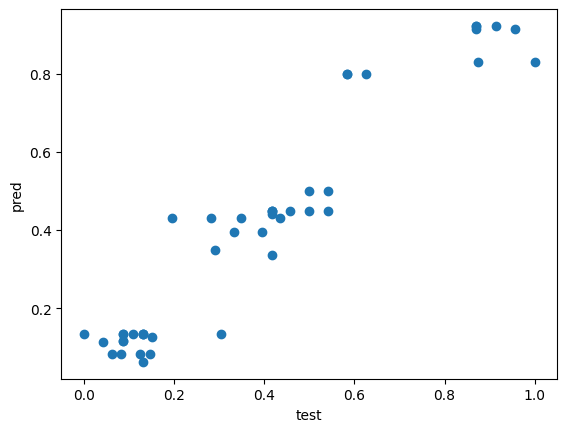

In [34]:
get_plt(Y_test, get_fit(X_train, Y_train, knn))

In [35]:
e2 = get_e(Y_test, get_fit(X_train, Y_train, knn))

MAE: [0.06057312 0.06666667] MSE: [0.00714835 0.00873264] RMSE: [0.08454792 0.09344859] R2: [0.93177893 0.82531025]


In [36]:
model_e['knn'] = e2

In [37]:
# Подбор параметра: количество соседей
errors = []

for i in range(1, 10):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, Y_train)
    Y_pred_knn = knn.predict(X_test)

    e = np.sqrt(mean_squared_error(Y_test, Y_pred_knn))
    errors.append(e)

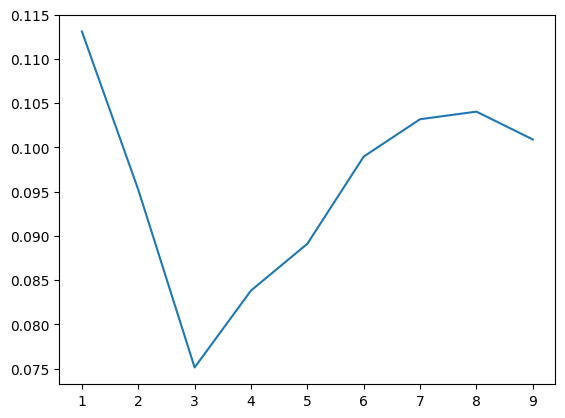

In [38]:
plt.plot([i for i in range(1, 10)], errors)

In [39]:
knn_neighbors = KNeighborsRegressor(n_neighbors=3)

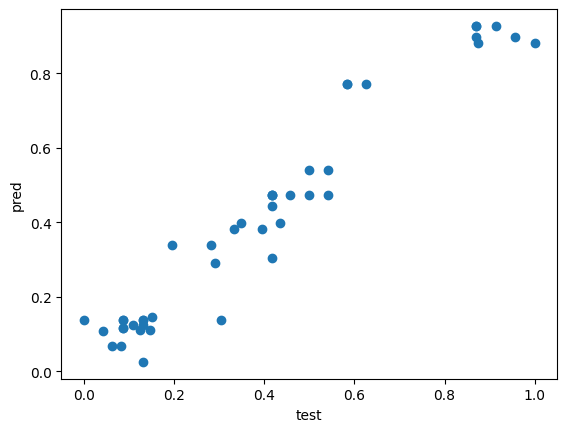

In [40]:
get_plt(Y_test, get_fit(X_train, Y_train, knn_neighbors))

In [41]:
e3 = get_e(Y_test, get_fit(X_train, Y_train, knn_neighbors))

MAE: [0.05385375 0.05618687] MSE: [0.00493892 0.0063482 ] RMSE: [0.07027746 0.07967562] R2: [0.95286486 0.87300904]


In [42]:
model_e['knn_neighbors'] = e3

In [ ]:
# кросс валидация и перекрестная проверка, подбор оптимальных гиперпараметров

In [43]:
n_neighbors = list(range(1, 10))
p = [1, 2]
weights = ["uniform", "distance"]

hyperparameters = dict(n_neighbors=n_neighbors, weights=weights, p=p)
print(hyperparameters)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'weights': ['uniform', 'distance'], 'p': [1, 2]}


In [44]:
search = GridSearchCV(knn, hyperparameters, cv=3)

In [45]:
best_model = search.fit(X_train, Y_train)

In [ ]:
best_model.best_estimator_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=7, p=2,
          weights='distance')

In [ ]:
search = GridSearchCV(knn, hyperparameters, cv=5, verbose=2)
best_model = search.fit(X_train, Y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] n_neighbors=1, weights=uniform, p=1 .............................
[CV] .............. n_neighbors=1, weights=uniform, p=1, total=   0.0s
[CV] n_neighbors=1, weights=uniform, p=1 .............................
[CV] .............. n_neighbors=1, weights=uniform, p=1, total=   0.0s
[CV] n_neighbors=1, weights=uniform, p=1 .............................
[CV] .............. n_neighbors=1, weights=uniform, p=1, total=   0.0s
[CV] n_neighbors=1, weights=uniform, p=1 .............................
[CV] .............. n_neighbors=1, weights=uniform, p=1, total=   0.0s
[CV] n_neighbors=1, weights=uniform, p=1 .............................
[CV] .............. n_neighbors=1, weights=uniform, p=1, total=   0.0s
[CV] n_neighbors=1, weights=distance, p=1 ............................
[CV] ............. n_neighbors=1, weights=distance, p=1, total=   0.0s
[CV] n_neighbors=1, weights=distance, p=1 ............................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............. n_neighbors=2, weights=distance, p=2, total=   0.0s
[CV] n_neighbors=2, weights=distance, p=2 ............................
[CV] ............. n_neighbors=2, weights=distance, p=2, total=   0.0s
[CV] n_neighbors=2, weights=distance, p=2 ............................
[CV] ............. n_neighbors=2, weights=distance, p=2, total=   0.0s
[CV] n_neighbors=2, weights=distance, p=2 ............................
[CV] ............. n_neighbors=2, weights=distance, p=2, total=   0.0s
[CV] n_neighbors=2, weights=distance, p=2 ............................
[CV] ............. n_neighbors=2, weights=distance, p=2, total=   0.0s
[CV] n_neighbors=3, weights=uniform, p=1 .............................
[CV] .............. n_neighbors=3, weights=uniform, p=1, total=   0.0s
[CV] n_neighbors=3, weights=uniform, p=1 .............................
[CV] .............. n_neighbors=3, weights=uniform, p=1, total=   0.0s
[CV] n_neighbors=3, weights=uniform, p=1 .............................
[CV] .

[CV] n_neighbors=7, weights=distance, p=1 ............................
[CV] ............. n_neighbors=7, weights=distance, p=1, total=   0.0s
[CV] n_neighbors=7, weights=distance, p=1 ............................
[CV] ............. n_neighbors=7, weights=distance, p=1, total=   0.0s
[CV] n_neighbors=7, weights=distance, p=1 ............................
[CV] ............. n_neighbors=7, weights=distance, p=1, total=   0.0s
[CV] n_neighbors=7, weights=distance, p=1 ............................
[CV] ............. n_neighbors=7, weights=distance, p=1, total=   0.0s
[CV] n_neighbors=7, weights=distance, p=1 ............................
[CV] ............. n_neighbors=7, weights=distance, p=1, total=   0.0s
[CV] n_neighbors=7, weights=uniform, p=2 .............................
[CV] .............. n_neighbors=7, weights=uniform, p=2, total=   0.0s
[CV] n_neighbors=7, weights=uniform, p=2 .............................
[CV] .............. n_neighbors=7, weights=uniform, p=2, total=   0.0s
[CV] n

[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    1.1s finished


In [46]:
knn_best = best_model.best_estimator_

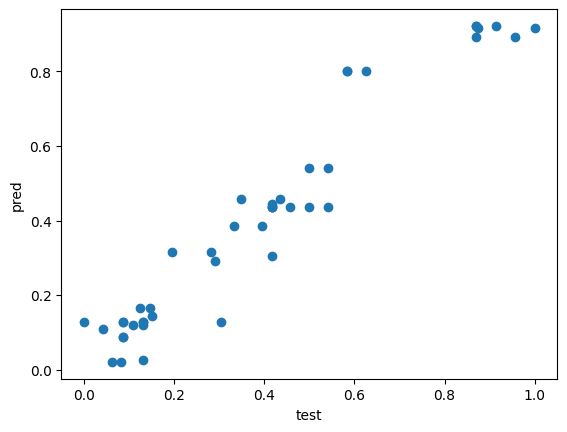

In [47]:
get_plt(Y_test, get_fit(X_train, Y_train, knn_best))

In [48]:
e4 = get_e(Y_test, get_fit(X_train, Y_train, knn_best))

MAE: [0.04878129 0.06332071] MSE: [0.00473991 0.00796248] RMSE: [0.06884699 0.08923273] R2: [0.95476416 0.84071668]


In [49]:
model_e['knn_best'] = e4

### Дерево решений/ Случайный лес

In [50]:
n_estimators = [int(x) for x in np.linspace(start=50, stop=400, num=3)]

max_depth = [int(x) for x in np.linspace(10, 110, num=2)]

max_depth.append(None)
min_samples_leaf = [1, 4]

param_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_leaf': min_samples_leaf
              }
param_grid

{'n_estimators': [50, 225, 400],
 'max_depth': [10, 110, None],
 'min_samples_leaf': [1, 4]}

In [51]:
rf = RandomForestRegressor()

In [52]:
rf_random = GridSearchCV(estimator=rf,
                         param_grid=param_grid,
                         cv=3,
                         verbose=2)

rf_random.fit(X_train, Y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] END ..max_depth=10, min_samples_leaf=1, n_estimators=50; total time=   0.1s
[CV] END ..max_depth=10, min_samples_leaf=1, n_estimators=50; total time=   0.1s
[CV] END ..max_depth=10, min_samples_leaf=1, n_estimators=50; total time=   0.1s
[CV] END .max_depth=10, min_samples_leaf=1, n_estimators=225; total time=   0.3s
[CV] END .max_depth=10, min_samples_leaf=1, n_estimators=225; total time=   0.3s
[CV] END .max_depth=10, min_samples_leaf=1, n_estimators=225; total time=   0.3s
[CV] END .max_depth=10, min_samples_leaf=1, n_estimators=400; total time=   0.8s
[CV] END .max_depth=10, min_samples_leaf=1, n_estimators=400; total time=   0.8s
[CV] END .max_depth=10, min_samples_leaf=1, n_estimators=400; total time=   0.9s
[CV] END ..max_depth=10, min_samples_leaf=4, n_estimators=50; total time=   0.1s
[CV] END ..max_depth=10, min_samples_leaf=4, n_estimators=50; total time=   0.1s
[CV] END ..max_depth=10, min_samples_leaf=4, n_e

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 110, None],
                         'min_samples_leaf': [1, 4],
                         'n_estimators': [50, 225, 400]},
             verbose=2)

In [53]:
rf = rf_random.best_estimator_

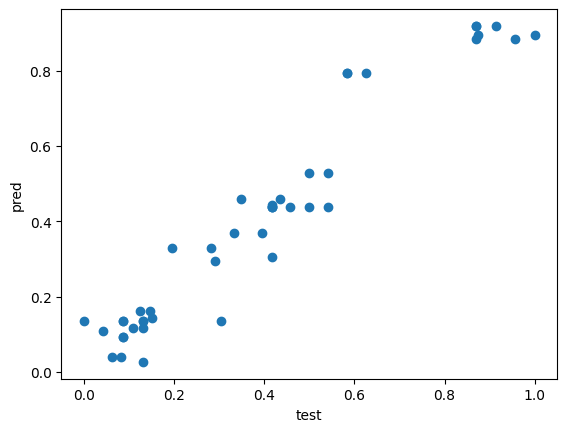

In [54]:
get_plt(Y_test, get_fit(X_train, Y_train, rf))

In [55]:
e5 = get_e(Y_test, get_fit(X_train, Y_train, rf))

MAE: [0.05085552 0.06301576] MSE: [0.0050688  0.00783944] RMSE: [0.07119552 0.0885406 ] R2: [0.95162533 0.84317805]


In [56]:
model_e['rf'] = e5

### Регрессия с множественными выходами

In [57]:
moutr_gb = MultiOutputRegressor(GradientBoostingRegressor(n_estimators=400, learning_rate=1.0,
                                                          max_depth=1, random_state=0)).fit(X_train, Y_train)

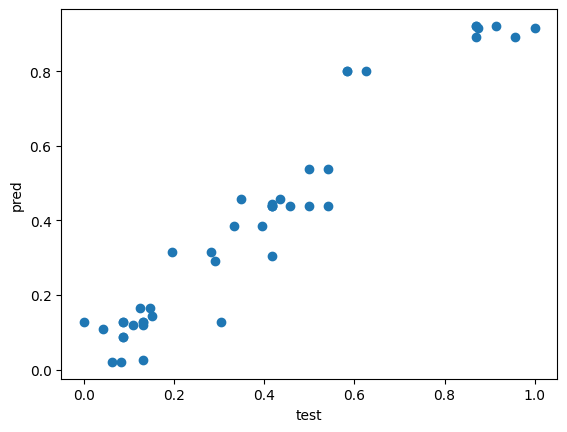

In [58]:
get_plt(Y_test, get_fit(X_train, Y_train, moutr_gb))

In [59]:
e6 = get_e(Y_test, get_fit(X_train, Y_train, moutr_gb))

MAE: [0.04886679 0.06326113] MSE: [0.00474039 0.00796905] RMSE: [0.0688505  0.08926952] R2: [0.95475955 0.84058533]


In [60]:
model_e['moutr_gb'] = e6

### Выводы

In [61]:
# Модель с лучшим результатом по целевой переменной Ширина: knn_best
# Модель с лучшим результатом по целевой переменной Глубина: knn_neighbors
get_best_model()

width_best: Model    knn_best
MAE      0.048781
MSE       0.00474
RMSE     0.068847
R2       0.954764
Name: width, dtype: object
depth_best: Model    knn_neighbors
MAE           0.056187
MSE           0.006348
RMSE          0.079676
R2            0.873009
Name: depth, dtype: object


,Model,MAE,MSE,RMSE,R2
width,knn_best,0.048781,0.004740,0.068847,0.954764
width,moutr_gb,0.048867,0.004740,0.068850,0.954760
width,knn_neighbors,0.053854,0.004939,0.070277,0.952865
width,rf,0.050856,0.005069,0.071196,0.951625
width,knn,0.060573,0.007148,0.084548,0.931779
width,LinR,0.074768,0.007817,0.088414,0.925397
depth,knn_neighbors,0.056187,0.006348,0.079676,0.873009
depth,rf,0.063016,0.007839,0.088541,0.843178
depth,knn_best,0.063321,0.007962,0.089233,0.840717
depth,moutr_gb,0.063261,0.007969,0.089270,0.840585


## Сохранение моделей

In [70]:
with open('knn_best.pkl', 'wb') as file:
    pickle.dump(knn_best, file)

In [71]:
with open('knn_neighbors.pkl', 'wb') as file:
    pickle.dump(knn_neighbors, file)

##Загрузка моделей из файла

In [72]:
with open('knn_best.pkl', 'rb') as file:
    knn_best = pickle.load(file)

In [74]:
knn_best.predict(X_test)

array([[0.31521739, 0.16666667],
       [0.31521739, 0.16666667],
       [0.12681159, 0.4375    ],
       [0.02536232, 0.30555556],
       [0.92173913, 0.8       ],
       [0.12681159, 0.4375    ],
       [0.89130435, 0.91666667],
       [0.12681159, 0.4375    ],
       [0.45652174, 0.02083333],
       [0.08695652, 0.54166667],
       [0.12681159, 0.4375    ],
       [0.92173913, 0.8       ],
       [0.92173913, 0.8       ],
       [0.11956522, 0.38541667],
       [0.45652174, 0.02083333],
       [0.14492754, 0.29166667],
       [0.08695652, 0.54166667],
       [0.10869565, 0.44444444],
       [0.11956522, 0.38541667],
       [0.89130435, 0.91666667],
       [0.12681159, 0.4375    ],
       [0.12681159, 0.4375    ]])

In [73]:
with open('knn_neighbors.pkl', 'rb') as file:
    knn_neighbors = pickle.load(file)

In [75]:
knn_neighbors.predict(X_test)

array([[0.34057971, 0.11111111],
       [0.34057971, 0.11111111],
       [0.13768116, 0.47222222],
       [0.02536232, 0.30555556],
       [0.92753623, 0.77083333],
       [0.13768116, 0.47222222],
       [0.89855072, 0.88194444],
       [0.13768116, 0.47222222],
       [0.39855072, 0.06944444],
       [0.11594203, 0.54166667],
       [0.13768116, 0.47222222],
       [0.92753623, 0.77083333],
       [0.92753623, 0.77083333],
       [0.12318841, 0.38194444],
       [0.39855072, 0.06944444],
       [0.14492754, 0.29166667],
       [0.11594203, 0.54166667],
       [0.10869565, 0.44444444],
       [0.12318841, 0.38194444],
       [0.89855072, 0.88194444],
       [0.13768116, 0.47222222],
       [0.13768116, 0.47222222]])